In [80]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.getcwd()))

from engine import Value
from utils import draw_trace

Hasta el momento, las únicas operaciones que implementamos en la clase `Value` son la suma, multiplicación y la tangente hiperbólica.

No implementamos por ejemplo las operaciones con constantes. Por ejemplo:
```python
a = Value(2.0)
a + 1
```

Para implementar operaciones con constantes, agregamos la línea:
```python
other = other if isinstance(other, Value) else Value(other)
```
a las operaciones.

In [82]:
a = Value(2.0)
a + 1

Value(data=3.0, label=)

In [83]:
a = Value(2.0)
print(a + 1)
print(a * 2)

Value(data=3.0, label=)
Value(data=4.0, label=)


Lo siguiente no anda:
```python
a = Value(2.0)
2 * a
```

No anda porque Python internamente hace:
```python
2.__mul__(a)
```
Y a un `int` no puede multiplicarlo por un `Value`. Para solucionarlo, hay que implementar la función `__rmul__` en la clase `Value`.

`__rmul__` sirve como un fallaback: si Python no puede resolver `2 * a` (esto sería que un `int` "no sabe" multiplicar por un `Value`), se fija si puede resolver `a * 2` (esto es que un `Value` sepa multiplicar un `int`).

In [84]:
a = Value(2.0)
2 * a

Value(data=4.0, label=)

Tampoco implementamos las operaciones "atómicas" de esta última, que son la exponenciación y la división.

Para la exponenciación, implementamos `exp()`, que es la operación de `a.exp() = e^a`.

In [85]:
a.exp()

Value(data=7.38905609893065, label=)

Para la división, tenemos que:
$$
\frac{a}{b} = a \cdot \frac{1}{b} = a \cdot b^{-1}
$$

Entonces, lo que vamos a implementar es la operación de potencia "general" (no la de $e$).

La división entre dos instancias de un nuevo tipo de dato (como es `Value`) se implementa con `__truediv__`. Lo que hacemos es:
```python
def __truediv__(self, other): # self / other
    return self * other**-1
```

Y para implementar la potencia, definimos `__pow__`.

In [86]:
a = Value(2.0)
b = Value(4.0)
a / b

Value(data=0.5, label=)

In [87]:
a**2

Value(data=4.0, label=)

También implementamos la resta, con `__sub__`.

In [88]:
a - b

Value(data=-2.0, label=)

Ahora, tomamos el ejemplo de antes y en lugar de aplicar `tanh()` directamente, la aplicamos como:
$$
\tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}
$$

Así lo teníamos implementado:

In [89]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weight corresponding to each input w1, w1
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neurona
# this number gives "nice" values of the derivatives
b = Value(6.8813735870195432, label='b')

# operations
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

# cell body (no activation function applied)
n = x1w1x2w2 + b; n.label = 'n'

# Necesitamos implementar tanh sobre un Value
o = n.tanh(); o.label = 'o'

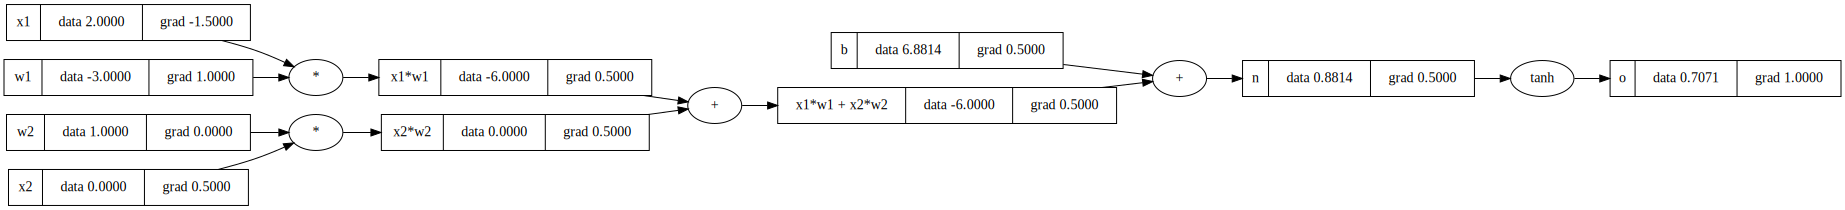

In [90]:
o.backward()
draw_trace(o)

Desmembramos `tanh()` en sus operaciones atómicas:

In [93]:
# Antes
o = n.tanh(); o.label = 'o'

# Ahora
e = (2*n).exp(); e.label = 'e'
o = (e - 1) / (e + 1); o.label = 'o'

Ahora vamos a ver un grafo más largo, porque dividimos `o` en varias operaciones.

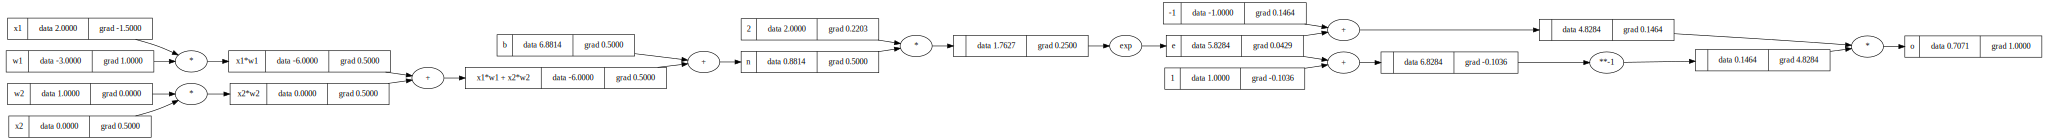

In [92]:
o.backward()
draw_trace(o)